In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.svm import SVC
# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Generate some synthetic data that is linear separable.

sklearn.datasets.samples_generator.make_blobs generates isotropic Gaussian blobs for clustering. Given some parameters, it will return X and y for you with shape of (n_samples, n_features) and (n_samples) respectively.

In [2]:
from sklearn.datasets.samples_generator import make_blobs, make_circles
X, y = make_blobs(
n_samples=100,
n_features=2,
centers=2,
random_state=0,
cluster_std=0.6
)
print("X[0]:", X[0])
print("y[0]:", y[0])
print(X.shape, y.shape)

X[0]: [3.35320909 1.69958043]
y[0]: 1
(100, 2) (100,)


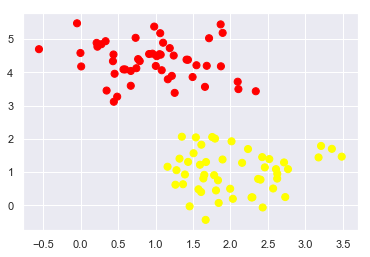

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim() # (x_min, x_max) in x-axis
    ylim = ax.get_ylim() # (y_min, y_max) in y-axis
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=150, linewidth=1, facecolors='none', color='blue');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



In [5]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637],
       [1.53853211, 2.04370263]])

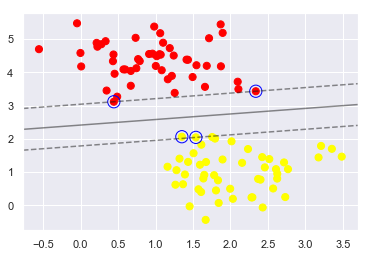

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# What if the dataset cannot be linear separated?

In [8]:
X, y = make_circles(
n_samples=100,
noise=0.1,
factor=0.2,
random_state=1
)
print(X.shape, y.shape)


(100, 2) (100,)


## split into training and test data

In [9]:
X_train, y_train, X_test, y_test = X[:80], y[:80], X[80:], y[80:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 2) (80,) (20, 2) (20,)


## plot the training data

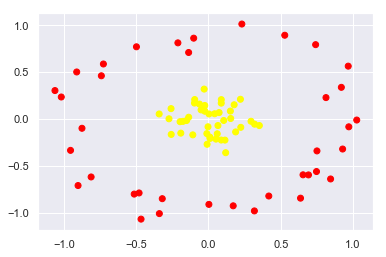

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='autumn')

## plot the test data

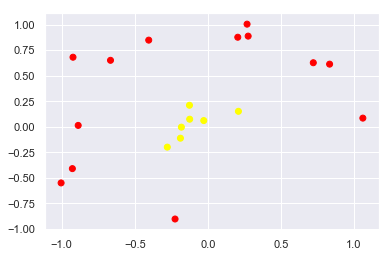

In [11]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='autumn')

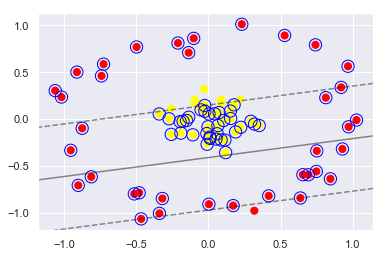

In [12]:
clf = SVC(C=100.0, kernel='linear')
clf.fit(X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf)

## Run inference on the test set

In [13]:
y_hat = clf.predict(X_test)
print(y_hat.shape)

(20,)


## How did our model perform on the test set?
side note: accuracy metric here could be misleading because we don't consider class imbalance. 

In [14]:
print(np.sum(y_hat == y_test) / float(y_test.shape[0])) # manual calculation. Cast to float b/c integer may truncate
print(sklearn.metrics.accuracy_score(y_hat, y_test)) # leverage sklearn

0.4
0.4


## what if we use a different value for C?

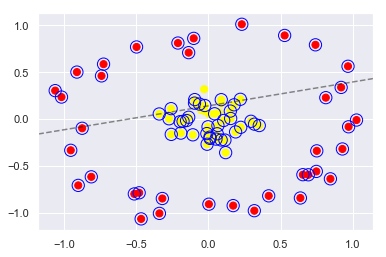

In [15]:
clf = SVC(C=0.001, kernel='linear')

clf.fit(X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# Question
• What is C?

• Describe how the value of C affect the number of support vectors?

# nonlinear svm

c:\users\patrick\envs\ml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


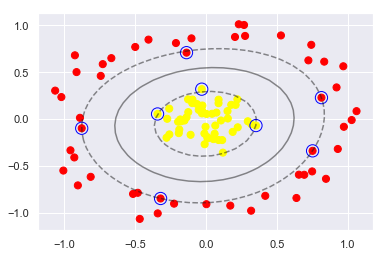

In [16]:
clf = SVC(C=10., kernel='rbf')

clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# Practice Questions
1) What's the test accuracy for the rbf kernel

2) Try fitting an svm with a polynomial kernel and compare the test accuracy

### Question 1

In [17]:
y_hat = clf.predict(X_test)
print(sklearn.metrics.accuracy_score(y_hat, y_test))

1.0


### Question 2

c:\users\patrick\envs\ml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


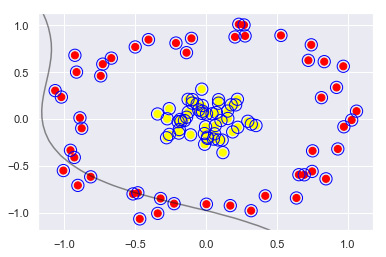

In [23]:
clf = SVC(C=.1, kernel='poly')

clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

In [19]:
y_hat = clf.predict(X_test)
print(sklearn.metrics.accuracy_score(y_hat, y_test))

0.45
